In [3]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_image_paths(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)
    
    # Filter only for image files (you can add more extensions if needed)
    image_files = [os.path.join(folder_path, f) for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')) and not f.startswith('.')]
    image_names = [os.path.splitext(f)[0] for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', 'gif')) and not f.startswith('.')]
    if not image_files:
        print(f"No image files found in {folder_path}")
    
    return image_files, image_names

def display_images_in_jupyter(image_paths, columns=2):
    if not image_paths:
        print("No images to display.")
        return
    
    total_images = len(image_paths)
    rows = -(-total_images // columns)  # Calculate number of rows needed
    
    # Create a grid to display images
    fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, image_path in enumerate(image_paths):
        if i >= total_images:
            break
        
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    
    # Remove empty subplots
    for i in range(total_images, rows * columns):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

In [4]:
dev_folder_path = "./devset_images/devset_images/"
test_folder_path = "./testset_images/testset_images/"
dev_image_paths = get_image_paths(dev_folder_path)[0]
test_image_paths = get_image_paths(test_folder_path)[0]
print(len(dev_image_paths))
print(len(test_image_paths))

5280
1320


In [5]:
def list_file_extensions(folder_path):
    return list({os.path.splitext(file)[1].lower() for root, dirs, files in os.walk(folder_path) for file in files})

print(list_file_extensions(dev_folder_path))

['.png', '.gif', '.jpg']


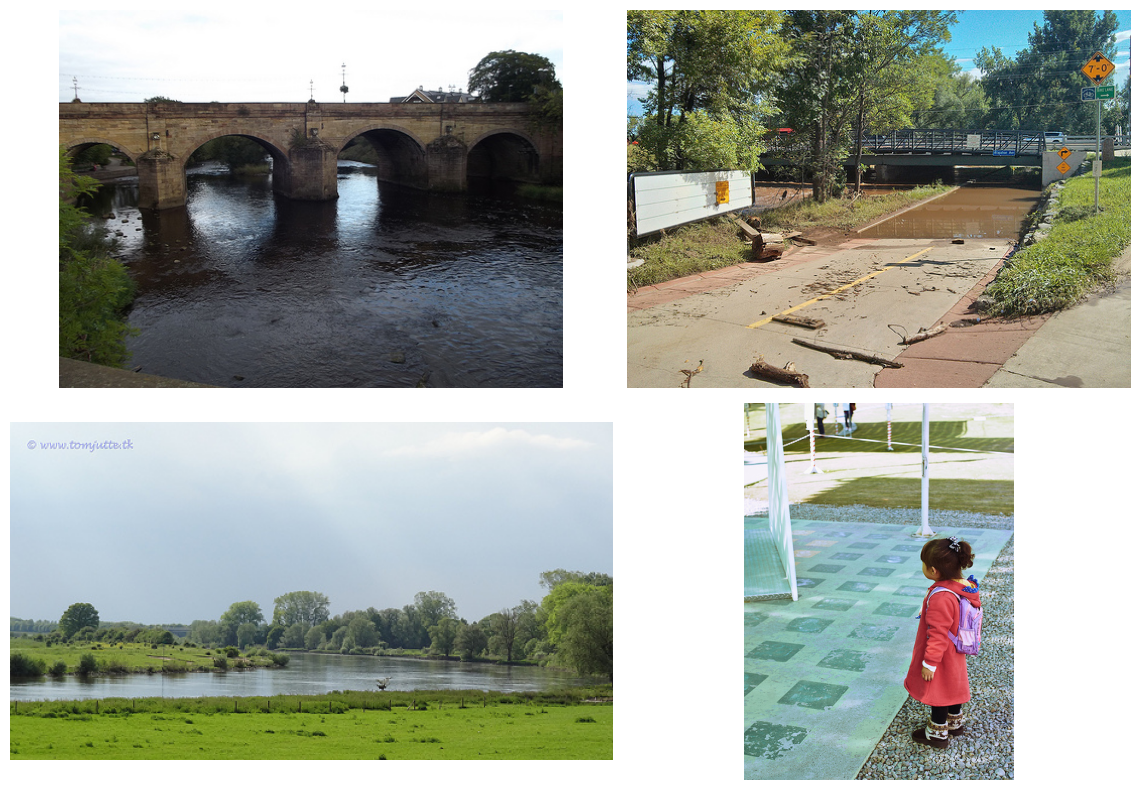

In [6]:
display_images_in_jupyter(dev_image_paths[0:4], columns=2)

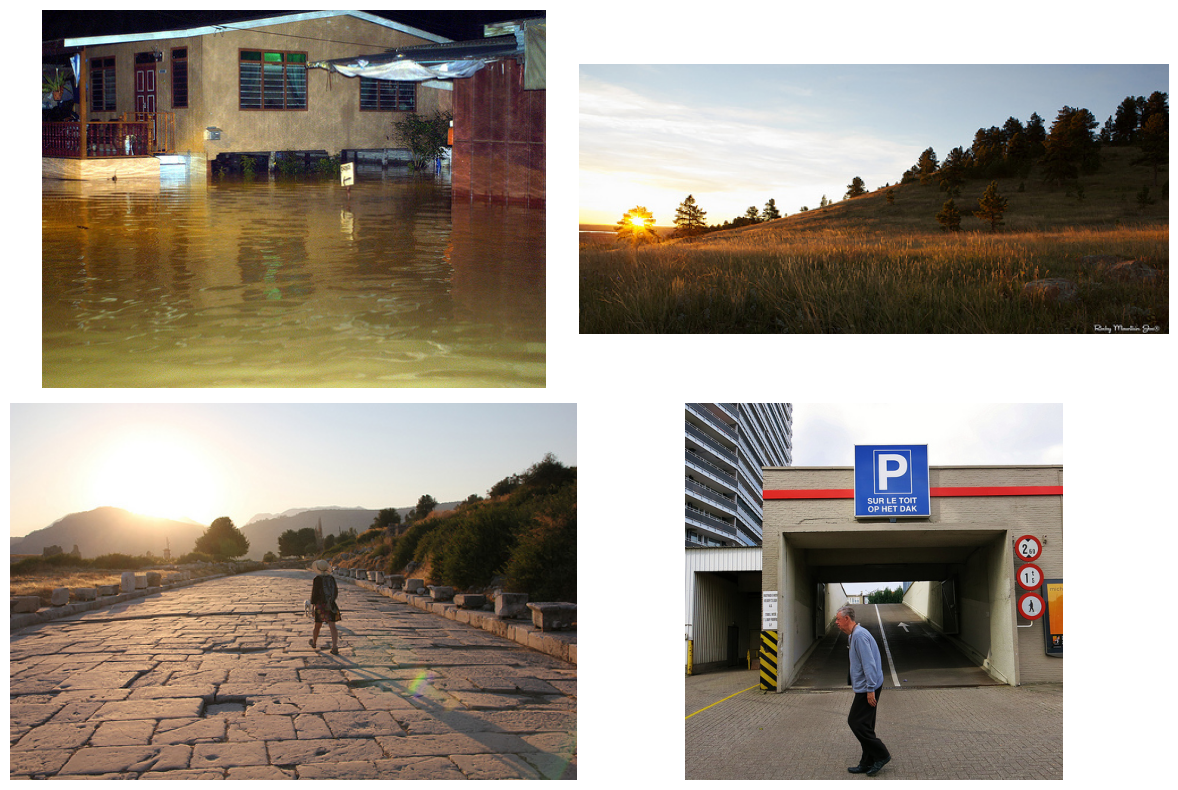

In [7]:
display_images_in_jupyter(test_image_paths[0:4], columns=2)

In [8]:
def images_to_numpy_array(image_paths, target_size=(375, 500)):
    return [np.array(Image.open(image_path).resize(target_size)) for image_path in image_paths]
dev_image_arrays = images_to_numpy_array(dev_image_paths)
test_image_arrays = images_to_numpy_array(test_image_paths)

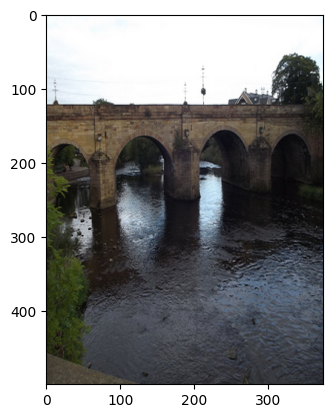

In [14]:
plt.imshow(dev_image_arrays[0])

In [9]:
from collections import Counter

# Flatten the list of shapes
dev_shapes = [tuple(arr.shape) for arr in dev_image_arrays]
test_shapes = [tuple(arr.shape) for arr in test_image_arrays]

In [17]:
dev_shape_counter = Counter(dev_shapes)
dev_shape_counter

Counter({(500, 375, 3): 5280})

In [18]:
test_shape_counter = Counter(test_shapes)
test_shape_counter.most_common(1)

[((500, 375, 3), 1320)]

In [19]:
dev_df = pd.read_csv("./devset_images_gt.csv")
sorted_df = dev_df.sort_values(by="id")
array_sorted_df = np.array(sorted_df["id"])
array_sorted_df, array_sorted_df.shape

(array([     224249,      228743,      473932, ..., 13948706965,
        13989148346, 14006803563], dtype=int64),
 (5280,))

In [20]:
dev_image_names = np.array(get_image_paths(dev_folder_path)[1], dtype="int64")
test_image_names = np.array(get_image_paths(test_folder_path)[1], dtype="int64")
dev_image_names, dev_image_names.shape

(array([10002110906, 10009244396, 10018187456, ...,   994898305,
         9960400403,   996993940], dtype=int64),
 (5280,))

In [21]:
all(np.sort(dev_image_names) == array_sorted_df)

True

In [113]:
dev_image_vectors = [image.reshape(-1) for image in dev_image_arrays]

In [114]:
dict1 = dict(zip(dev_image_names, dev_image_vectors))

In [115]:
dict2 = dev_df.set_index('id')['label'].to_dict()

In [164]:
merged_dict = {k: (v, dict2[k]) for k, v in dict1.items() if k in dict2}
X_train = np.array([item[0] for item in merged_dict.values()]).T
Y_train = np.array([item[1] for item in merged_dict.values()]).reshape(1,-1)

In [165]:
X_train.shape, Y_train.shape

((562500, 5280), (1, 5280))

In [166]:
X_train

array([[248, 125, 233, ..., 255,  47,   0],
       [252, 134, 243, ..., 255,  64,   4],
       [255, 112, 244, ..., 251,  94,  16],
       ...,
       [ 52, 167, 102, ...,  42, 168,  36],
       [ 52, 155, 135, ...,  43, 117,  42],
       [ 60, 132,  27, ...,  14,  73,  38]], dtype=uint8)

In [171]:
X_train[1] = zscore(X_train[1])

In [168]:
zscore(X_train[1])

array([-0.52605858, -0.53551668, -0.52605858, ..., -0.52605858,
       -0.53551668,  1.87629942])

In [169]:
X_train[1]

array([  1,   0,   1, ...,   1,   0, 255], dtype=uint8)

In [173]:
X_train.astype("float32")

MemoryError: Unable to allocate 11.1 GiB for an array with shape (562500, 5280) and data type float32

# Normalize datasets

In [155]:
from scipy.stats import zscore

In [156]:
# Assuming X_train is a list of images
for i in range(len(X_train)):
    X_train[i] = zscore(X_train[i], axis=0)

KeyboardInterrupt: 

In [ ]:
X_train

In [ ]:
zscore([1, 2, 3, 0])